# EDA Project for Instacart

### Project Description:
Perform Exploratory Data Analysis (EDA) to understand the shopping habits of Instacart customers

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Load datasets and set new variable names
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';' )
products = pd.read_csv('/datasets/products.csv', sep = ';')
aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
departments = pd.read_csv('/datasets/departments.csv', sep = ';')
order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')

In [ ]:
# Display the structure and first few rows of each dataset

print(instacart_orders.info())
print(instacart_orders.head())
print()
print(products.info())
print(products.head())
print()
print(aisles.info())
print(aisles.head())
print()
print(departments.info())
print(departments.head())
print()
print(order_products.info(show_counts = True))
print(order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 

<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b> First I imported all the necessary packages (it's best to keep this section seperate as you may need to update with more packages as you work through the project). Next I set a new variable for each of the datafiles so it is easy to call them out as needed. I looked at the structure of each file using df.info() because this provides us with 4 critical pieces of information: size of the dataset, number of null-values, column names and their data types. Lastly, I used df.head() to see a few of the rows within each dataset to a get a good outlook on the kind of data we're working with.

### Task 1: Find and remove duplicate values. Describe your process.

### `orders` data frame

In [2]:
# Check for duplicated orders
print(instacart_orders.duplicated().sum())

15


In [4]:
# Remove duplicate orders
instacart_orders = instacart_orders.drop_duplicates()
print(instacart_orders.duplicated().sum())

0


In [6]:
# Double check for duplicate order IDs only
print(instacart_orders.duplicated(subset=['order_id']).sum())

0


### `products` data frame

In [7]:
# Check for fully duplicate rows
print(products.duplicated().sum())

0


In [ ]:
# Check for just duplicates on product IDs
print(products.duplicated(subset=['product_id'], keep = False).sum())

0


In [ ]:
# Check for just duplicate product names (convert names to lowercase to compare more accurately)
products['product_name'] = products['product_name'].str.lower()
print(products.duplicated(subset=['product_name'], keep = False).sum())

1465


In [10]:
# Check for duplicate product names that aren't missing
products_filtered = products.dropna(subset=['product_name'])
print(products_filtered.duplicated(subset=['product_name'], keep = False).sum())

207


<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b> Seeing there are 1465 duplicates is concerning, so I created a new df called products_filtered that removed all records where the product_name was missing. Then I re-checked for duplicates on the product_name column of products_filtered and saw the number of duplicates drop down to 207, which is still high but much less than before.

### `departments` data frame

In [11]:
# Check for fullly duplicate rows
print(departments.duplicated())
print()
print(departments.duplicated().sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

0


In [12]:
# Double check for any other tricky duplicates
print(departments.duplicated(subset = ['department']).sum())
print(departments.duplicated(subset = ['department_id']).sum())

0
0


<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b> Since the departments datafile is very small, I can show duplicates as a boolean as well, just as an alternative to the sum method I applied earlier. Seeing that all the rows are false means there are no duplicate entries here. As a sanity check I also verified duplicates on department_id column as well.

### `aisles` data frame

In [13]:
# Check for fullly duplicate rows
print(aisles.duplicated().sum())

0


In [14]:
# Double check for any other tricky duplicates
print(aisles.duplicated(subset = ['aisle']).sum())
print(aisles.duplicated(subset = ['aisle_id']).sum())

0
0


### `order_products` data frame

In [15]:
# Check for fullly duplicate rows
print(order_products.duplicated().sum())

0


In [16]:
# Double check for any other tricky duplicates
print(order_products.duplicated(subset=['product_id', 'order_id'], keep = False).sum())

0


<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b> The thought process here is that since there are 2 main identifier columns in 'order_id' and 'product_id', we need to just check if there are any duplicates where both order_id and product_id are exactly the same. When checked for this, the result is 0. So there are no tricky duplicates here.

###  Task 2: Find and remove missing values


### `products` data frame

In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
# Check for missing values associated with aisle_id
missing_products = products[products['product_name'].isna()]
print(missing_products['aisle_id'].unique())

[100]


In [ ]:
# Check for missing values associated with department_id
missing_products = products[products['product_name'].isna()]
print(missing_products['department_id'].unique())

[21]


In [20]:
# What is this ailse and department?
print(aisles[aisles['aisle_id'] == 100])
print()
print(departments[departments['department_id'] == 21])


    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


In [21]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b> By using products.info() I can see all the columns within the products df and the null values within each column. Luckily we only have 1 column 'product_name' with the missing values. Additionally, I found that all the Missing Values for product_name were associated with asisle_id = 100 and department_id = 21. An important factor to consider in EDA is what to do with entries that have missing values. In this case, I updated all missing values in the products to 'Unknown', instead of simply deleting these values.

### `orders` data frame

In [22]:
instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [23]:
# Are there any missing values where it's not a customer's first order
first_orders = instacart_orders[instacart_orders['order_number'] == 1]
repeat_orders = instacart_orders[instacart_orders['order_number'] > 1]
print(first_orders.isna().sum())
print()
print(repeat_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b>
In order to check whether missing values occur in first orders or repeat orders, I created a dataframe called first_orders (instacart_orders with order_number = 1) and a dataframe called repeat_orders (instacart_orders with order_number greater than 1), indicating a customer's 2nd or more order. Then I checked for null values in both first_orders and repeat_orders dataframes, using df.isna().sum(). From the results, we see that there 28,817 null values in the first_orders dataframe in the 'days_since_prior_order' column. Whereas, the repeat_orders dataframe shows 0 null values all across the columns. As such, all null values occur with customer's first orders and never in a customer's repeat orders.

### `order_products` data frame

In [24]:
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [25]:
# What are the min and max values in this column?
min, max = order_products['add_to_cart_order'].agg(['min', 'max'])
print(min, max)

1.0 64.0


In [26]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
orders_missing_values = order_products[order_products['add_to_cart_order'].isna()]
print(orders_missing_values['order_id'].unique())

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [27]:
# Do all orders with missing values have more than 64 products?
print(orders_missing_values.groupby('order_id')['product_id'].count().sort_values(ascending = False))

## No, none of the orders with missing values have more than 64 products as the maximum value is only 63 for 1 order_id.

order_id
61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
888470      1
1598369     1
747668      1
1677118     1
9310        1
Name: product_id, Length: 70, dtype: int64


In [28]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
order_products.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b>
I found the null values in order_products dataframe with df.isna().sum(), which showed there are null values in 'add_to_cart_order' column. Then I found min and max for that column to be 1 and 64. Then I created a new dataframe called orders_missing_value for all the records where 'add_to_cart_order' column was null. Then I applied the .unique() method to the 'order_id' column of this dataframe to get all distinct order IDs with at least one missing value in 'add_to_cart_order'. Next to answer the question, do all orders with missing values have more tha 64 products? I did the following: I took the orders_missing_values df and grouped by Order_Id then I used the count() function on the 'product_id' column to yield total products per order_id. Then I sorted by descending order to see the maximum value of products. This showed the max value of the product is 63. So the answer, is No, None of the orders with missing values have more than 64 products. Finally, I replaced the missing values in 'add_to_cart_order' with 999, converted to integer type and verified for null values using df.isna().sum().

### Task 3a: Verify that the `'order_hour_of_day'` ranges from 0 to 23, and the `'order_dow'` values range from 0 to 6, in the `orders` tables.

In [29]:
instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [30]:
print(instacart_orders['order_hour_of_day'].sort_values().unique())
print()
print(instacart_orders['order_dow'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

[0 1 2 3 4 5 6]


<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b>
I verified that there were no null values in the columns of order_hour_of_day and order_dow and then used .unique() to check if both columns were in their appropriate range. They are both sensible and within range

### Task 3b: What time of day do people shop for groceries?

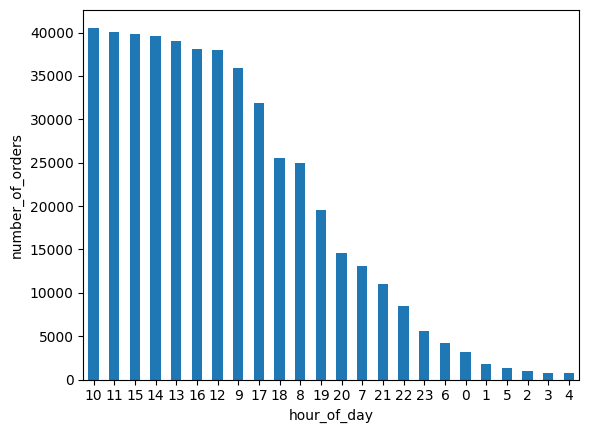

In [31]:
number_of_orders = instacart_orders['order_hour_of_day'].value_counts()
number_of_orders.plot(x = 'order_hour_of_day', xlabel = 'hour_of_day', ylabel = 'number_of_orders', rot = 0, kind = 'bar')
plt.show()

In [3]:
# Check for all orders placed Wednesday at 2:00 AM
print(instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b> 
To visualize how the time of day affects customer's shopping habits, I used value_counts to total the number of orders submitted for each hour of the day and then plotted this using a bar graph and sorted by highest number of orders. From the graph, we see 10am and 11am are the most preferred time slots for customers to buy groceries, followed by the afternoon window from noon-4pm. The hours when least number of customers shop for groceries are between midnight and 4am, which makes sense as most people are sleeping at this time unless they work night-shift.

### Task 3c: What day of the week do people shop for groceries?

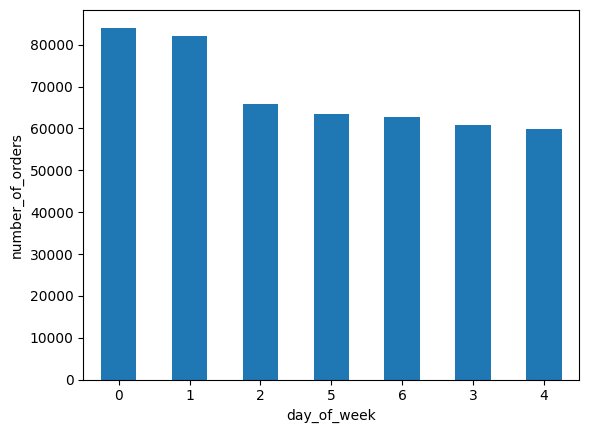

In [32]:
number_of_orders = instacart_orders['order_dow'].value_counts()
number_of_orders.plot(x = 'order_dow', xlabel = 'day_of_week', ylabel = 'number_of_orders', rot = 0, kind = 'bar')
plt.show()

<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b> 
Applying the same logic as the previous question, we can build a bar graph to visualize how days of the week affect customer's shopping habits. Here we see that Sunday (day=0) is the most popular day for Instacart Orders, followed by Monday, whereas the rest of the days are pretty much constant but certainly less than Sunday and Monday. Intuitively it makes sense that the most popular day would be Sunday.

### Task 3d: How long do people wait until placing another order?

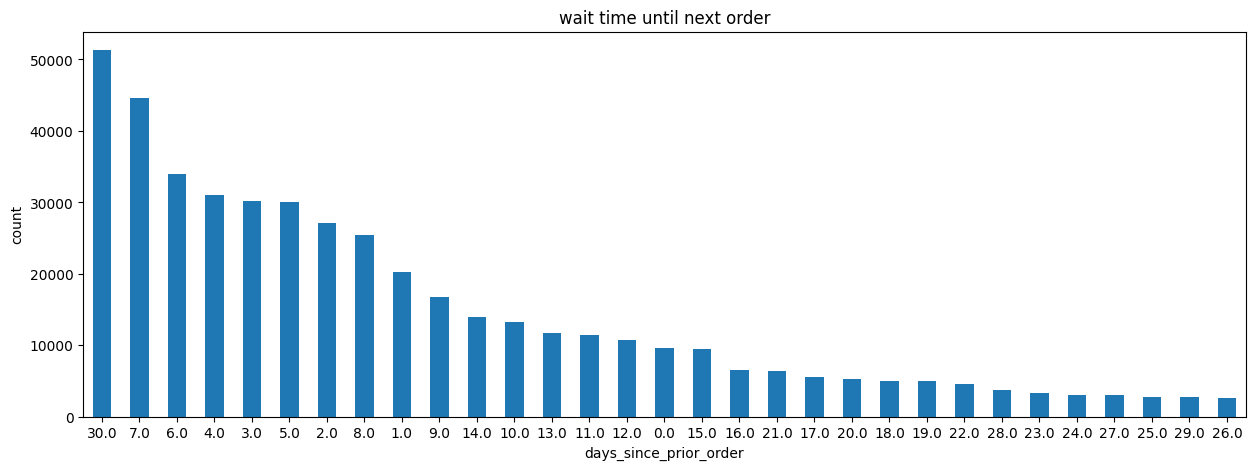

In [33]:
count = instacart_orders['days_since_prior_order'].value_counts()
count.plot(title = 'wait time until next order', x = 'days_since_prior_order', 
                      xlabel = 'days_since_prior_order', ylabel = 'count', 
                      rot = 0, kind = 'bar', figsize = [15,5])
plt.show()

In [34]:
print(count[count== count.max()])
print(count[count== count.min()])

30.0    51337
Name: days_since_prior_order, dtype: int64
26.0    2640
Name: days_since_prior_order, dtype: int64


<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b>
Applying Value Counts on the 'days_since_prior_order column, sorting the data and plotting it on a bar graph, we can see that most of the repeat orders come at least 30 days post the first order. This makes sense as there may be a lot of customers that order on a monthly basis (perhaphs subscriptions). Futhermore, the 2nd max time is 7 days, which adds support to the reasoning behind 30 days as there are many customer's who tend to do a weekly order or subscription as well. Some of the least days between orders occur between 22 and 29 as these are somewhat odd days and suggests these are manual one-offs rather than repeats/subscriptions.

### Task 4a: Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms and describe the differences.

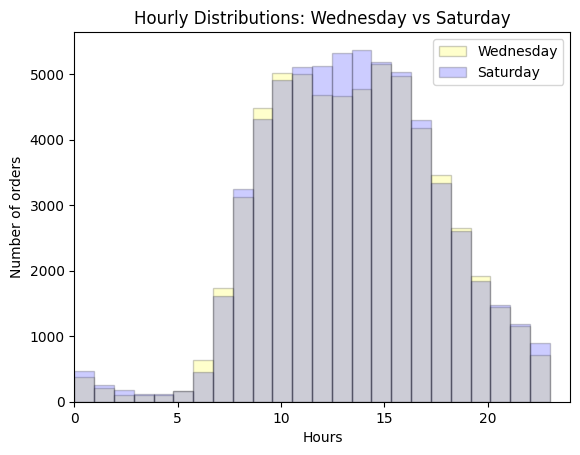

In [35]:
wed_orders = instacart_orders[instacart_orders['order_dow'] == 3]
sat_orders = instacart_orders[instacart_orders['order_dow'] == 6]
plt.hist(wed_orders['order_hour_of_day'],bins = 24, color = 'yellow', edgecolor='black', alpha = 0.2, label = 'Wednesday')
plt.hist(sat_orders['order_hour_of_day'],bins = 24, color = 'blue', edgecolor='black', alpha = 0.2, label = 'Saturday')
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.title('Hourly Distributions: Wednesday vs Saturday')
plt.xlim([0,24])
plt.legend()

<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b>
As per the graph above, we can see that the hourly distributions of orders received on Wednesdays vs Saturdays are similar but with some differences as well:


- Early morning window on Wednesday may see more orders than on Saturdays, which makes sense as Wednesday is a school/working day.
- Conversely, Saturday late night window sees a greater peak in orders than on Wednesdays since people sleep earlier on Wednesdays being that is a school/work night.
- Lastly, during lunch hours (12-2) it seems like on Saturdays the peak is greater since lunch is more relaxed; however, on Wednesdays the peaks fall right before and after the lunch window, seeing that lunch time may be limited on a work day, so customers may want to order before lunch begins or immediately after it ends.
- Overall the distributions are very similar as they rise early morning, peak between 11am-3pm, then fall down into the night.

### Task 4b: What's the distribution for the number of orders per customer?

In [36]:
orders_per_customer = instacart_orders.groupby('user_id')['order_id'].count()

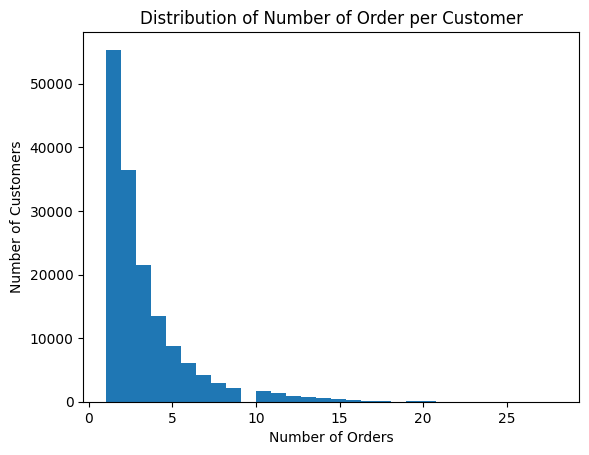

In [37]:
orders_per_customer.plot(kind = 'hist', bins = 30, title = 'Distribution of Number of Order per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b>
Using a histogram, we can plot the distribution of number of orders per customer and we can conclude that the majority of the customers only order once or twice. The number of customers with more than 10 orders is very low margin. The general trend is the most people make very few orders and a few people make a lot of orders. This is very useful information for a company for understanding their customer base. This allows them to market differently to those who only order once by providing some incentives like discounts on their next purchase. Additionally, the can identify and acknowledge the customers that have lots of orders by giving them rewards or other forms of recognition.

### Task 4c: What are the top 20 popular products (display their id and name)?

In [38]:
popular_products = order_products.groupby('product_id')['order_id'].count().reset_index().sort_values(by= 'order_id', ascending = False)
top_20 = popular_products.head(20)
top_20

,product_id,order_id
22808,24852,66050
12025,13176,53297
19370,21137,37039
20077,21903,33971
43271,47209,29773
43788,47766,24689
43663,47626,21495
15364,16797,20018
24047,26209,19690
25556,27845,19600


In [39]:
top_20 = top_20.merge(products, on = 'product_id', how = 'inner')
top_20[['product_id', 'product_name', 'order_id']]

,product_id,product_name,order_id
0,24852,banana,66050
1,13176,bag of organic bananas,53297
2,21137,organic strawberries,37039
3,21903,organic baby spinach,33971
4,47209,organic hass avocado,29773
5,47766,organic avocado,24689
6,47626,large lemon,21495
7,16797,strawberries,20018
8,26209,limes,19690
9,27845,organic whole milk,19600


<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b>
To identify the top 20 most frequenely ordered products, I started by first grouping the entries by product_id and order_id and then applying count on each to get a total number of orders per product. I sorted it from most to least and limited the list to 20 most ordered products. Since we want the name of the product as well, I needed to merge the products dataset onto this new list of top20 that I created. I applied the inner merge to retain only data matching on both datasets. Compiling this list we see the top 20 most ordered products and the most ordered is bananas.

### Task 5a: How many items do people typically buy in one order? What does the distribution look like?

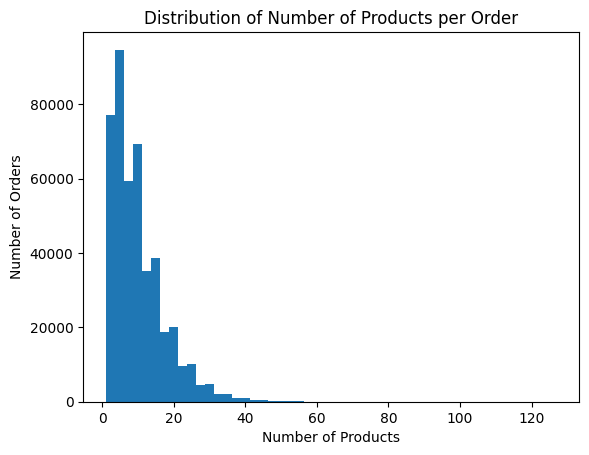

In [40]:
products_per_order = order_products.groupby('order_id')['product_id'].count()
products_per_order.plot(kind = 'hist', bins = 50)
plt.title('Distribution of Number of Products per Order')
plt.xlabel('Number of Products')
plt.ylabel('Number of Orders')
plt.show()

In [41]:
products_per_order.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b>
First I grouped the data by order_id and applied count to the product_id to see the number of products per order. I graphed the distribution using a histogram and based on the graph, we know the distribution is very Right-Skewed because most of the datapoints are grouped on the left side of the graph meanwhile a very small number of points exist on the right. We can also make the statement that most customers tend to buy less than 10 products per order, whereas only a few number of customers have bought more than 30 products per order. I verified this using df.describe() and saw the mean was at 10 and a std of 7.5. Studying the distributions in this manner can help a company understand identify the needs of their different customer bases and how they can cater to each group differently.

### Task 5b: What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [42]:
top_20 = order_products.groupby('product_id')['reordered'].sum().reset_index().sort_values(by= 'reordered', ascending = False)
top_20 = top_20.merge(products, on = 'product_id', how = 'left')
top_20[['product_id', 'reordered', 'product_name']].head(20)

,product_id,reordered,product_name
0,24852,55763,banana
1,13176,44450,bag of organic bananas
2,21137,28639,organic strawberries
3,21903,26233,organic baby spinach
4,47209,23629,organic hass avocado
5,47766,18743,organic avocado
6,27845,16251,organic whole milk
7,47626,15044,large lemon
8,27966,14748,organic raspberries
9,16797,13945,strawberries


<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b>
I applied similar technique as in a previous task above. I simply filtered the order_products dataset to groupby 'product_id' and sum (not count) the reordered column to get the number of times each product was re-ordered. I sorted by descending to get the most reordered products at the top. Then I merged in with the products dataset on product_id and finally only kept the columns I wanted with 20 rows

### Task 5c: For each product, what proportion of its orders are reorders?

In [43]:
total_reorders = order_products.groupby('product_id')['reordered'].sum().reset_index().sort_values(by= 'reordered', ascending = False)
total_orders = order_products.groupby('product_id')['order_id'].count().reset_index().sort_values(by='order_id', ascending = False)
proportion = total_orders.merge(total_reorders, on = 'product_id', how = 'left')
proportion['proportion'] = proportion['reordered'] / proportion['order_id'] 
proportion = proportion.merge(products, on = 'product_id', how = 'inner')
print(proportion[['product_id', 'product_name', 'order_id', 'reordered', 'proportion']])

       product_id                                       product_name  \
0           24852                                             banana   
1           13176                             bag of organic bananas   
2           21137                               organic strawberries   
3           21903                               organic baby spinach   
4           47209                               organic hass avocado   
...           ...                                                ...   
45568        5836                       arctic d cod liver oil lemon   
45569       43573                                     whisk- 10 inch   
45570       43570                                       queso cotija   
45571       36174                                  whole pinto beans   
45572       41403  extra rich & thick spaghetti sauce spices & se...   

       order_id  reordered  proportion  
0         66050      55763    0.844254  
1         53297      44450    0.834006  
2         37

<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b>
I created 2 new dataframes called total_orders and total_reorders, which shows the total number of orders and reorders, respectively, per product_id. Then I merged the 2 datasets so all the information was together as follows, the product_id with total number of orders and total number of reorders. Then I created a proportion column that was assigned to the value of the reordered sum divided by the ordered sum for each record. This shows the proportion of reorders for each product. Then I merged this dataset with products dataset to retrieve the product_names. So as an example, Bananas with product_id 24852 were ordered 66,050 times and reordered 55,763 times which means that 55,763 divided by 66,0505 gives the proportion value of 0.844. Therefore, 84% of all banana orders are reorders.

### Task 5d: What are the top 20 items that people put in their carts first? 

In [ ]:
added_first = order_products[order_products['add_to_cart_order'] ==  1]
top_added_first = added_first['product_id'].value_counts().reset_index()
top_added_first.columns = ['product_id', 'sum_added_first']
top_added_first = top_added_first.merge(products, on = 'product_id', how = 'left')
top_added_first.head(20)

,product_id,sum_added_first,product_name,aisle_id,department_id
0,24852,15562,banana,24,4
1,13176,11026,bag of organic bananas,24,4
2,27845,4363,organic whole milk,84,16
3,21137,3946,organic strawberries,24,4
4,47209,3390,organic hass avocado,24,4
5,21903,3336,organic baby spinach,123,4
6,47766,3044,organic avocado,24,4
7,19660,2336,spring water,115,7
8,16797,2308,strawberries,24,4
9,27966,2024,organic raspberries,123,4


<div class="alert alert-block alert-success">
<div class style=color:black> 
<b>Code Comments:</b>
I filtered the order_products database so it only included items that were added first at least once, using the add_to_cart_order column in the order_products dataset. Then I used value_counts to count how many times each product was added in cart, and sorted it with most at top. I renamed the columns to make it easier and finally I merged this dataframe with the products dataframe to retreive the product names. I printed top 20 and as expected from the previous analysis, bananas are the first item added for the greatest number of orders.

<div class="alert alert-block alert-warning">
<div class style=color:black> 
<b>Conclusion:</b>
This project was heavily structured on performing EDA on a group of datasets all relating to a single company and its customers. The goal of this project was to identify, visualize and understand the various shopping habits of the customers of Instacart. For any EDA project, the first steps are to clean and preprocess the data prior to starting any actual analysis, which includes finding and addressing duplicates and missing values. One important note here is that it is best to apply data cleaning steps to each individual file rather than merging them into 1 master file as it avoids potential gaps in the data. Since there were several files with varying data in each file, the data cleaning and preprocessing takes quite a bit of time but the more time put here, the more time is saved later. 

This objective of this project was to help a company like Instacart understand its customer's habits better so they can improve the needs of their customers as well as generate a greater revenue for themselves. As such, we started by looking when do customer's shop the most, and we learned that Sundays and Mondays and morning time between 10am and 11am is the highest activity periods. Instacart can study the different activity levels throughout each day to see when is a low period and why that might be the case. For instance, middle of the week like Wednesdays are low activity along with nighttime from midnight to 4am. Additionally, by analyzing on different columns within all the datasets, we learned that most customers tend to order less products per order and have longer wait times between reorders. There is also a smaller but more loyal customer base that makes more frequent orders and bigger orders. Instacart can identify these different groups and apply different marketing tactics to cater to each one seperately. For instance, it can offer a discount on the next order for customers, who tend to wait a long time before re-ordering. Also, it can offer rewards and loyalty points for customers who tend to order more frequently. Lastly, we also analyzed some of the most popular and in-demand products by mergind different datasets, grouping and counting totals, we saw bananas are a heavily in-demand product that tend to be the first item a customer adds to their cart. This also lets Instacart know to better record the supplies of certain products over others. 

This is a great project for practicing the process of data cleaning, grouping and merging data, creating graphs and analyzing distributions. Overall, this was a fantastic project that led to a better understanding of what it means to conduct data analysis in real-world applications.